# Feature Selection and Dimension Reduction

* Beginners Guide To Dimension Reduction Techniques: https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/
* Feature Selection For Machine Learning in Python: https://machinelearningmastery.com/feature-selection-machine-learning-python/
* The Ultimate Guide to 12 Dimensionality Reduction Techniques: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
* PCA using Python (scikit-learn): https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [1]:
%matplotlib inline
import numpy as np              
import pandas as pd

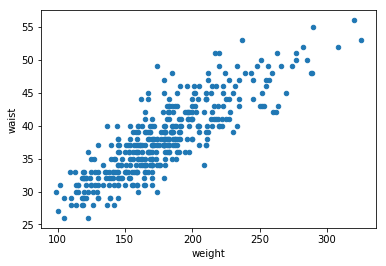

In [2]:
df = pd.read_csv("diabetes.csv")
df.plot.scatter(x='weight', y='waist')

In [3]:
df[["waist","weight"]].corr()

,waist,weight
waist,1.000000,0.849855
weight,0.849855,1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


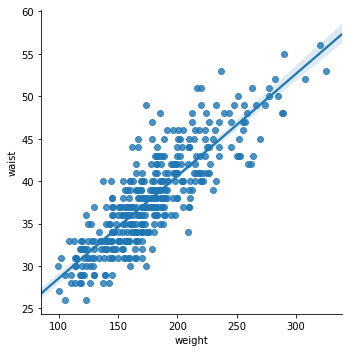

In [4]:
import seaborn as sns
sns.lmplot(x='weight',y='waist',data=df,fit_reg=True) 

## Missing Values

In [5]:
df = pd.read_csv("diabetes_missing_vals.csv")

# Let's look at how many missing values we have in our dataset
df.isnull().sum()

id                  0
chol                1
stab.glu            0
hdl                 1
ratio               1
glyhb              13
location            0
age                 0
gender              0
height              5
weight              1
frame              12
bp.1s             382
bp.1d             382
waist               2
hip                 2
wellness_score      0
dtype: int64

In [6]:
# Looking at the shape of our dataframe will allow us to see a total number of records
df.shape

(403, 17)

In [7]:
# Calculate the percentage of missing values
df.isnull().sum() / df.shape[0]

id                0.000000
chol              0.002481
stab.glu          0.000000
hdl               0.002481
ratio             0.002481
glyhb             0.032258
location          0.000000
age               0.000000
gender            0.000000
height            0.012407
weight            0.002481
frame             0.029777
bp.1s             0.947891
bp.1d             0.947891
waist             0.004963
hip               0.004963
wellness_score    0.000000
dtype: float64

## Low Variance
* A constant variable (all observations have same value)
* It cannot improve the power of model it has zero variance. 
* We should drop variables that have low variance compared to others because these variables will not explain the variation in response variables.


In [8]:
df.std()

id                11881.122124
chol                 44.445557
stab.glu             53.076655
hdl                  17.262626
ratio                 1.727886
glyhb                 2.242595
age                  16.312333
height                3.918515
weight               40.340666
bp.1s                30.962189
bp.1d                14.672780
waist                 5.729313
hip                   5.656713
wellness_score        0.000050
dtype: float64

In [ ]:
df["gender"].value_counts()

## Collinearity
* Variables (dimensions) with similar information or variation are called “Multicollinear”. 
* Dimensions exhibiting higher correlation can lower down the performance of model. 
* It is not good to have multiple variables of similar information or variation 



In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

In [ ]:
df.corr()

In [ ]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

## Univariate Feature Selection
* Statistical tests can be used to select those features that have the strongest relationship with the output variable.
* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* The example below uses the chi squared (chi^2) statistical test for non-negative features to select k of the best features from the Pima Indians onset of diabetes dataset.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_csv("pima_indians_diabetes.csv")
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
Y = df['Outcome']
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

scored_predictors = pd.concat([pd.Series(X.columns), 
                               pd.Series(fit.scores_)], axis=1)
scored_predictors.columns = ["Feature", "Score"]
scored_predictors.sort_values('Score', ascending=False)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669  181.304]


,Feature,Score
4,Insulin,2175.565273
1,Glucose,1411.887041
6,Age,181.303689
5,BMI,127.669343
0,Pregnancies,111.519691
3,SkinThickness,53.108040
2,BloodPressure,17.605373


## Recursive Feature Selection / Elimination

###  Recursive Feature Elimination: Logistic Regression Example

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("diabetes_missing_vals.csv")

df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight"]]
Y = df["chol"]
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Columns:", X.columns)
print("Num Features:",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Columns: Index(['stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 'height', 'weight'], dtype='object')
Num Features: 3
Selected Features:  [False  True  True  True False False False]
Feature Ranking:  [5 1 1 1 3 2 4]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

###  Recursive Feature Selection: Linear Regression Example

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df = pd.read_csv("diabetes_missing_vals.csv")
df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
Y = df["chol"]
model = LinearRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)
print("Num Features:",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)


Num Features: 1
Selected Features:  [False False  True False False False False False]
Feature Ranking:  [7 2 1 5 6 3 8 4]


## Factor Analysis
* Highly correlated features can be grouped by their correlations
* All variables in a particular group can be highly correlated among themselves but have low correlation with variables of other group(s). 
* Each group represents a single underlying construct or factor. 
* These factors are smaller in number as compared to large number of dimensions. 


In [ ]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_missing_vals.csv")

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
X.dropna(inplace=True)

FA = FactorAnalysis(n_components = 3).fit_transform(X.values)




In [ ]:
# Convert factor components into a dataframe
fa_df = pd.DataFrame(data=FA, columns=['component1','component2','component3'])
fa_df.head()

In [ ]:
X.shape

In [ ]:
fa_df.shape

In [ ]:
df_concat = pd.concat([X, fa_df], axis=1)
df_concat.head()


In [ ]:
# Convert factor components into a dataframe
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2'])
pca_df.head()

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

## Principal Component Analysis
* Features are transformed into a new set of features
* These new features are linear combination of original features. 
* These new sets of features are known as principal components. 
* They are obtained in such a way that first principle component accounts for most of the possible variation of original data
* Each succeeding component has the highest possible variance
* The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. 



In [ ]:
from sklearn.decomposition import PCA

df = pd.read_csv("pima_indians_diabetes.csv")
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
Y = df['Outcome']

# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
print("Components: ")


In [ ]:
# Convert principal components into a dataframe
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2'])
pca_df.head()


In [ ]:
print("Original dataframe shape: ")
print(df.shape)
print("PCA dataframe shape: ")
print(pca_df.shape)

In [ ]:
# Plot PCA results
colors = ['r', 'g']
pca_df.plot.scatter(x='component1', y='component2', c=colors)